In [1]:
import nltk
%matplotlib inline

In [2]:
#1: merchant 2: richard 3: macbeth
#4: jewmalta 5: edward 6: faustus
papers = {'shakespeare': [1, 2, 3], 
          'marlowe': [4, 5, 6], 
          'shared': [1,2,3,4,5,6],
          'macbeth': [1]}


In [3]:
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'plays/{filename}.txt',encoding='utf-8', mode='r') as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [4]:
play_by_author = {}
for author, files in papers.items():
    play_by_author[author] = read_files_into_string(files)

In [5]:
#sanity check
for author in papers:
    print(play_by_author[author][:100])

ACT I

SCENE I. Venice. A street.


 Enter Antonio, Salarino and Solanio.

ANTONIO.
In sooth I know 

Produced by Gary R. Young





THE JEW OF MALTA.



By Christopher Marlowe

Edited By The Rev. Alex
ACT I

SCENE I. Venice. A street.


 Enter Antonio, Salarino and Solanio.

ANTONIO.
In sooth I know 
ACT I

SCENE I. Venice. A street.


 Enter Antonio, Salarino and Solanio.

ANTONIO.
In sooth I know 


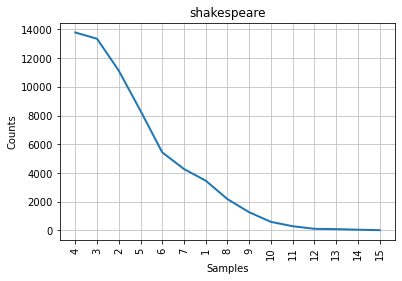

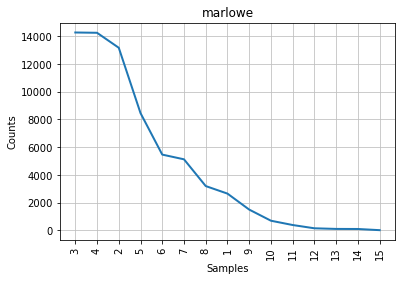

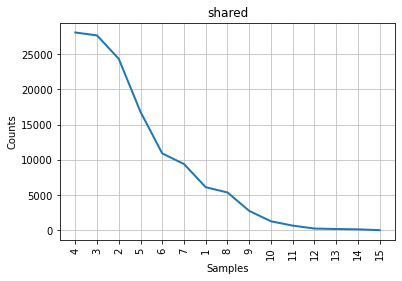

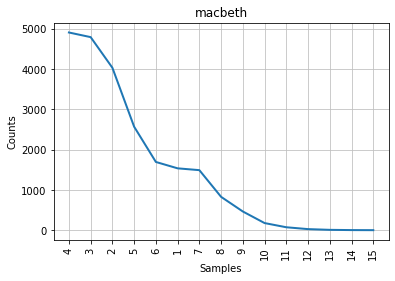

In [6]:
authors = ("shakespeare", "marlowe", "shared", "macbeth")

# Getting word tokens from corpora
play_by_author_tokens = {}
play_by_author_length_distributions = {}
for author in authors:
    tokens = nltk.word_tokenize(play_by_author[author])

    # Filtering out punctuation
    play_by_author_tokens[author] = ([token for token in tokens
                                            if any(c.isalpha() for c in token)])

    # Get a distribution of token lengths
    token_lengths = [len(token) for token in play_by_author_tokens[author]]
    play_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    play_by_author_length_distributions[author].plot(15,title=author)

In [7]:
authors = ("shakespeare","marlowe","shared")

# Convert papers to lowercase to count all tokens of the same word together
# regardless of case
for author in authors:
    play_by_author_tokens[author] = (
        [tok.lower() for tok in play_by_author_tokens[author]])

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += play_by_author_tokens[author]

# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))
whole_corpus_freq_dist[ :10 ]

[('the', 9492),
 ('and', 7976),
 ('i', 5954),
 ('of', 5588),
 ('to', 5560),
 ('my', 4002),
 ('a', 3868),
 ('in', 3408),
 ('that', 3228),
 ('you', 2906)]

In [8]:
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {}

    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(play_by_author_tokens[author])

    # Calculate each feature's presence in the subcorpus
    for feature in features:
        presence = play_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall

In [9]:
import math

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean
    # and standard deviation
    corpus_features[feature] = {}

    # Calculate the mean of the frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average

    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

In [10]:
feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:

        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) /
                                            feature_stdev)

In [13]:
testcase_tokens = nltk.word_tokenize(play_by_author["macbeth"])

# Filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens
                   if any(c.isalpha() for c in token)]

# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall

# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])

Test case z-score for feature the is 1.4368805111538936
Test case z-score for feature and is -5.33716845935286
Test case z-score for feature i is 7.3557526164364075
Test case z-score for feature of is -2.0275998935922774
Test case z-score for feature to is -1.2424776924477208
Test case z-score for feature my is 0.9022849586392706
Test case z-score for feature a is 5.422369494154668
Test case z-score for feature in is 46.57721450375515
Test case z-score for feature that is -3.0562691832096034
Test case z-score for feature you is 5.178729456729858
Test case z-score for feature is is 1.6136288483018961
Test case z-score for feature not is 2.9464914256088015
Test case z-score for feature me is 6.83319728131843
Test case z-score for feature with is -0.11224837715400689
Test case z-score for feature for is 6.3012434693700525
Test case z-score for feature be is 1.0486821845853862
Test case z-score for feature his is -1.7395537020894085
Test case z-score for feature it is 3.013454581222099
Tes

In [14]:
for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] -
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "Delta score for candidate", author, "is", delta )

Delta score for candidate shakespeare is 4.338844778066943
Delta score for candidate marlowe is 4.722291249970501
Delta score for candidate shared is 4.471772950140303
